In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/ML data sets /HackerEarth/Amazon hrirng/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/ML data sets /HackerEarth/Amazon hrirng/test.csv')

In [4]:
test.shape

(7160, 11)

In [5]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [7]:
train.skew()

customer_visit_score                0.101448
customer_product_search_score       0.289272
customer_ctr_score                  3.216021
customer_stay_score                 5.008726
customer_frequency_score            4.083013
customer_product_variation_score    1.851647
customer_order_score                0.576865
customer_affinity_score             2.993484
customer_category                   2.330354
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9301a3e6d8>,
      dtype=object)

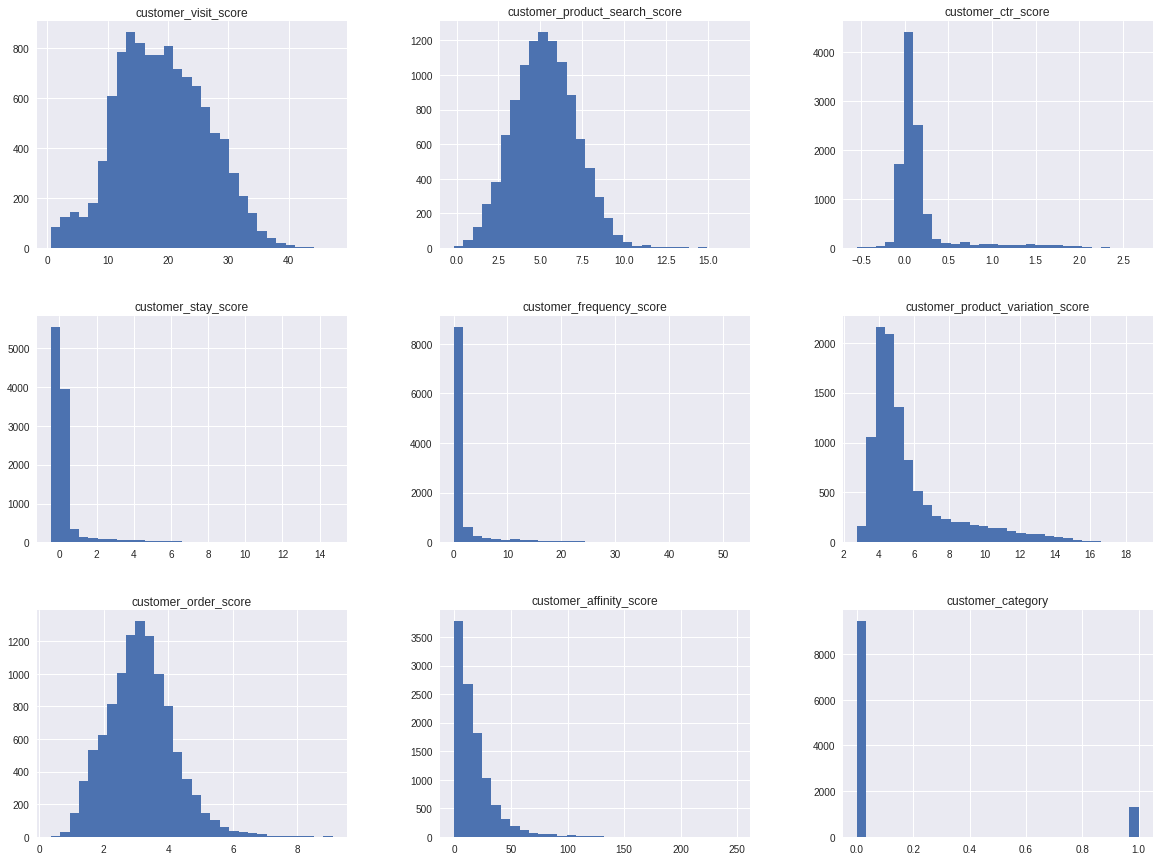

In [8]:
plt.style.use('seaborn')
train.hist(bins=30, figsize=(20,15))

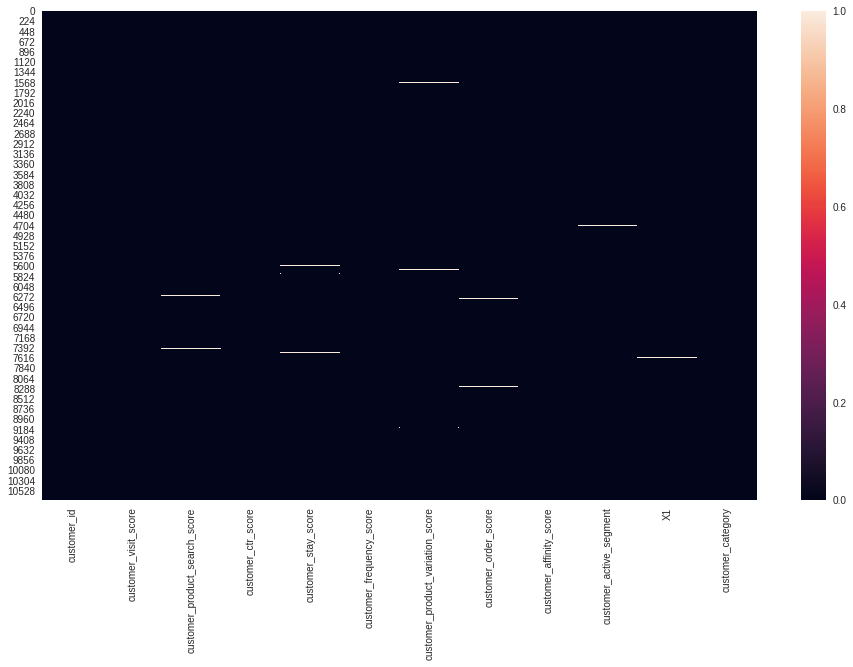

In [9]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92fce94438>,
      dtype=object)

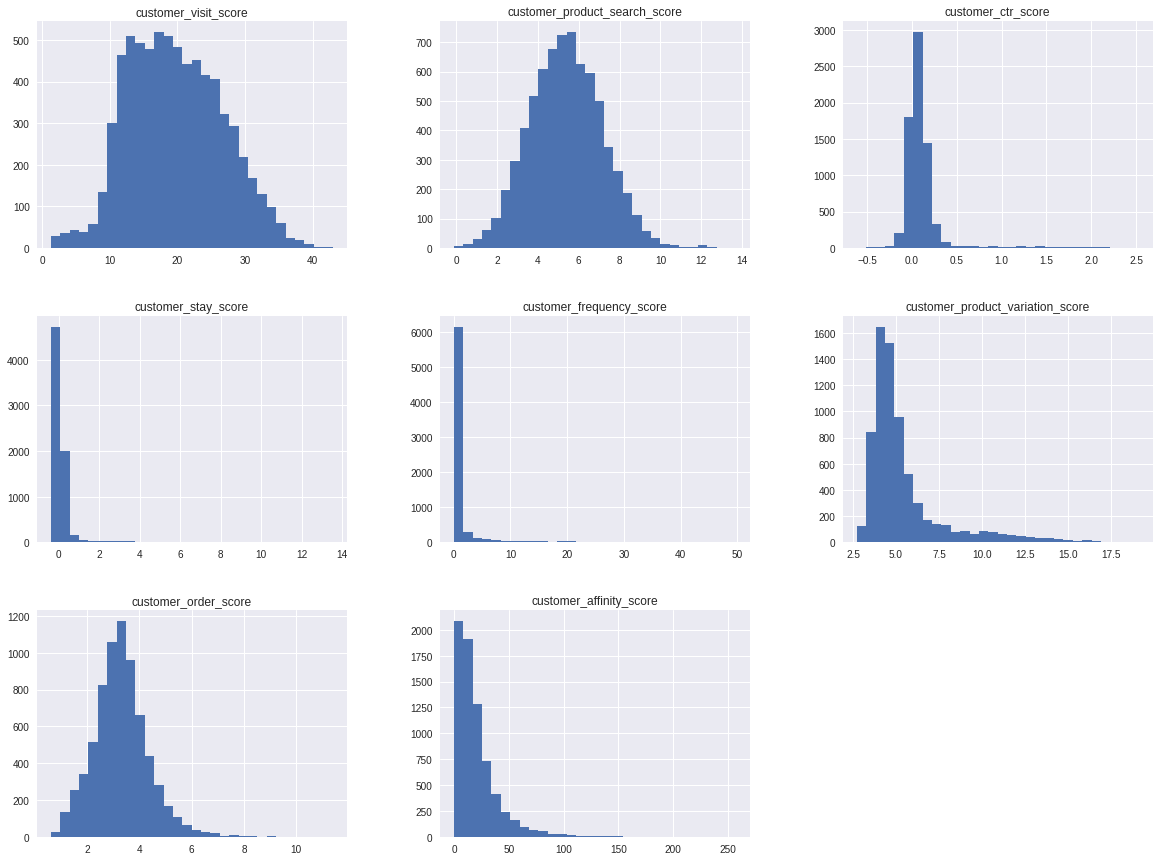

In [10]:
plt.style.use('seaborn')
test.hist(bins=30, figsize=(20,15))

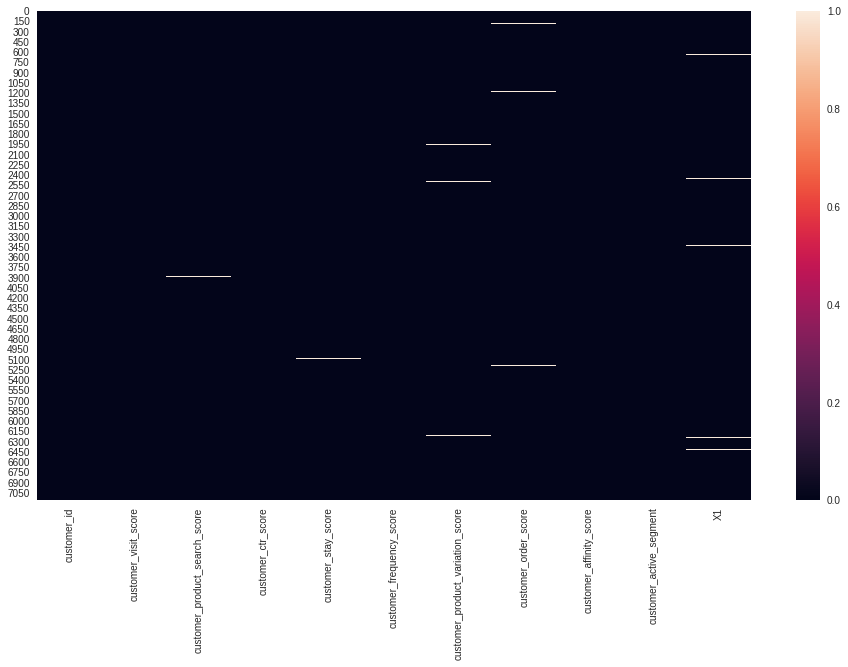

In [11]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())

In [12]:
# Get the percentages of null value
null_percent = train.isnull().sum()/train.shape[0]*100
null_percent

customer_id                         0.000000
customer_visit_score                0.000000
customer_product_search_score       0.391134
customer_ctr_score                  0.000000
customer_stay_score                 0.344571
customer_frequency_score            0.000000
customer_product_variation_score    0.428385
customer_order_score                0.614640
customer_affinity_score             0.000000
customer_active_segment             0.214193
X1                                  0.344571
customer_category                   0.000000
dtype: float64

In [13]:
# Get the percentages of null value
null_percent = test.isnull().sum()/test.shape[0]*100
null_percent

customer_id                         0.000000
customer_visit_score                0.000000
customer_product_search_score       0.405028
customer_ctr_score                  0.000000
customer_stay_score                 0.223464
customer_frequency_score            0.000000
customer_product_variation_score    0.600559
customer_order_score                0.572626
customer_affinity_score             0.000000
customer_active_segment             0.167598
X1                                  0.349162
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


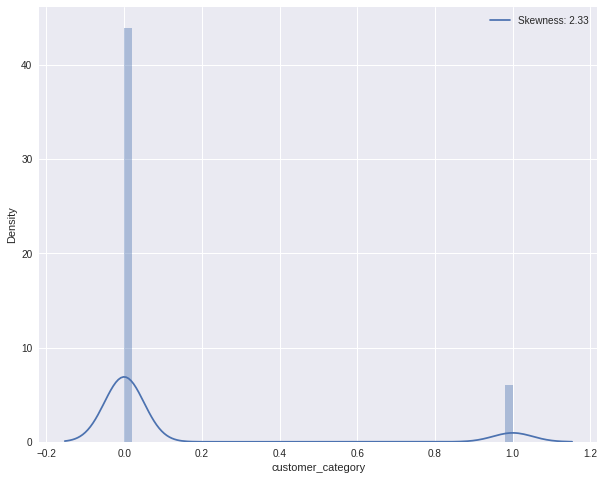

In [14]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(train["customer_category"])
bar.legend(["Skewness: {:.2f}".format(train['customer_category'].skew())])

(9.5, -0.5)

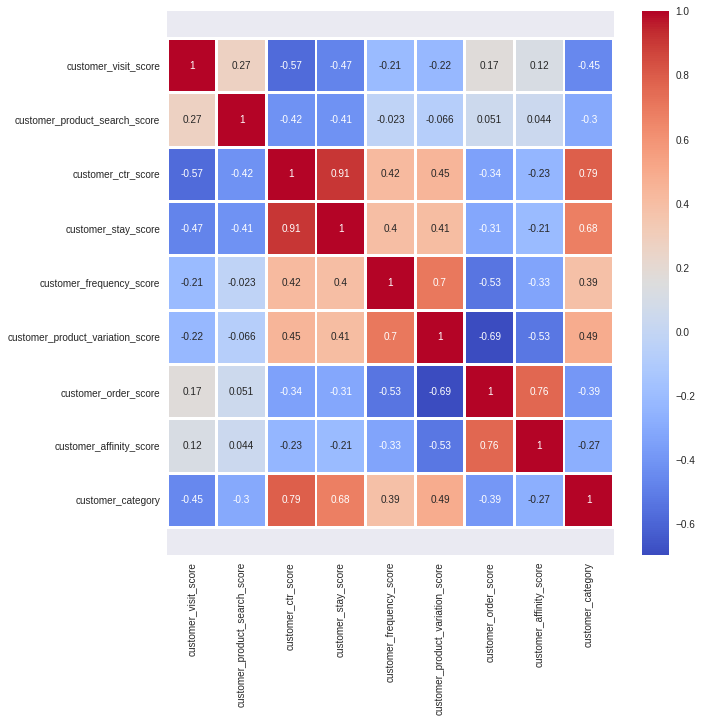

In [15]:
# correlation heatmap
plt.figure(figsize=(10,10))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [16]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["customer_category"]) >= 0.5]
hig_corr_features


Index(['customer_ctr_score', 'customer_stay_score', 'customer_category'], dtype='object')

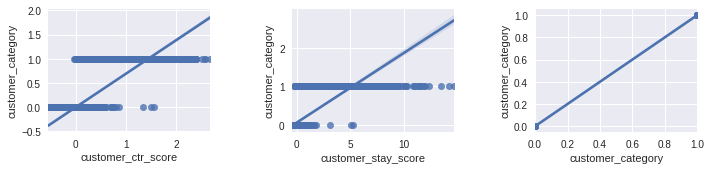

In [17]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=train, x = hig_corr_features[i], y = 'customer_category')

In [18]:
df = pd.concat([train, test]) 

In [19]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

customer_id                          0.000000
customer_visit_score                 0.000000
customer_product_search_score        0.396692
customer_ctr_score                   0.000000
customer_stay_score                  0.296122
customer_frequency_score             0.000000
customer_product_variation_score     0.497262
customer_order_score                 0.597832
customer_affinity_score              0.000000
customer_active_segment              0.195553
X1                                   0.346407
customer_category                   40.004470
dtype: float64

In [20]:
df.skew()

customer_visit_score                0.129677
customer_product_search_score       0.244059
customer_ctr_score                  3.651823
customer_stay_score                 5.744164
customer_frequency_score            4.273265
customer_product_variation_score    2.014995
customer_order_score                0.647046
customer_affinity_score             2.922714
customer_category                   2.330354
dtype: float64

In [21]:
df['customer_product_search_score'].fillna((df['customer_product_search_score'].mean()),inplace=True)
df['customer_stay_score'].fillna((df['customer_stay_score'].mean()),inplace=True)
df['customer_product_variation_score'].fillna((df['customer_product_variation_score'].mean()),inplace=True)
df['customer_order_score'].fillna((df['customer_order_score'].mean()),inplace=True)
df['customer_active_segment'].fillna((df['customer_active_segment'].mode()),inplace=True)
df['X1'].fillna((df['X1'].mode()),inplace=True)

In [22]:
skewed_features = ['customer_stay_score','customer_frequency_score','customer_ctr_score']

In [23]:
# decrease the skewnwnes of the data
for i in skewed_features:
    df[i] = np.log(df[i] + 1)

In [24]:
df['customer_category'].unique()

array([ 0.,  1., nan])

In [25]:
df.describe(include='all')

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
count,17898,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17863,17836,10738.000000
unique,17898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN
top,csid_4126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,BA,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8170,7321,NaN
mean,NaN,19.316747,5.319298,0.112247,0.146055,0.682236,5.650726,3.213842,18.192842,NaN,NaN,0.120600
std,NaN,7.253876,1.839256,0.212831,0.384519,0.749084,2.454796,1.045125,19.644527,NaN,NaN,0.325677
min,NaN,0.568965,-0.161940,-0.954860,-0.620815,0.022697,2.718819,0.363338,-0.501215,NaN,NaN,0.000000
25%,NaN,13.815484,4.054019,0.008378,-0.030612,0.262173,4.157108,2.535451,5.486786,NaN,NaN,0.000000
50%,NaN,18.974262,5.289748,0.067408,0.032126,0.399170,4.777815,3.181138,13.415359,NaN,NaN,0.000000
75%,NaN,24.617343,6.541416,0.138556,0.147888,0.679032,6.002599,3.803012,24.265867,NaN,NaN,0.000000


In [26]:
dummy_list=['customer_active_segment','X1']

In [ ]:
dummy_drop = []
clean_df = df
for i in dummy_list:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = dummy_list)
df = df.drop(dummy_drop, axis = 1)

In [28]:
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_1,13.168425,9.447662,-0.072789,-0.150289,0.362527,4.705761,2.537985,7.959503,0.0,0,0,0,1,0,0,0,0,0,1
1,csid_2,17.092979,7.329056,0.142626,-0.108394,0.322330,4.205138,4.193444,17.517381,0.0,0,0,0,1,0,1,0,0,0,0
2,csid_3,17.505334,5.143676,0.101391,0.233358,0.348999,4.479070,3.878971,12.595155,0.0,0,0,0,1,0,0,0,1,0,0
3,csid_4,31.423381,4.917740,-0.020433,-0.105945,0.575562,5.055535,2.708940,4.795073,0.0,0,1,0,0,0,0,0,0,0,1
4,csid_5,11.909502,4.237073,0.171579,0.159471,0.150200,3.445247,3.677360,56.636326,0.0,0,0,0,1,0,0,1,0,0,0


In [29]:
train_len = len(train)
train_ = df[:train_len]
test_ = df[train_len:]

In [30]:
test_.shape

(7160, 20)

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score

In [32]:
yi=train_['customer_category'].values.reshape(-1,1)
xi=train_.drop(['customer_category','customer_id'],axis=1)
Xi_train,Xi_test,yi_train,yi_test = train_test_split(xi,yi,test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier()

In [35]:
rfc.fit(Xi_train,yi_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
yi_pred = rfc.predict(Xi_test)

In [37]:
from sklearn import metrics

print('precison', metrics.precision_score(yi_test, yi_pred))


precison 0.9383259911894273


In [105]:
from sklearn.model_selection import GridSearchCV

In [29]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 300, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,1000]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15, 20, 25]

In [30]:

# Create the random grid
random_grid_01 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid_01)

{'n_estimators': [100, 145, 190, 236, 281, 327, 372, 418, 463, 509, 554, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 64, 123, 182, 241, 300], 'min_samples_split': [2, 5, 10, 15, 100, 1000], 'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25]}


In [33]:
rf_random_01 = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid_01,scoring='precision', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [34]:
rf_random_01.fit(Xi_train,yi_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rf_random_01.best_params_

{'max_depth': 300,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 418}

In [36]:
rf_random_01.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=418,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=418,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rfc.fit(Xi_train,yi_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=418,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred = rfc.predict(Xi_test)

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
clf = GradientBoostingClassifier(random_state=0)
y_pred = clf.fit(Xi_train,yi_train.ravel()).predict(Xi_test)
#y_pred = gnb.fit(Xi_train,yi_train.ravel()).predict(Xi_test)

In [92]:
from sklearn import metrics

print('precison', metrics.precision_score(yi_test, y_pred))

precison 0.9152542372881356


In [ ]:
rf_random_01 = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid_01,scoring='precision', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:


parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1,n_iter = 10, verbose=2, random_state=42)


In [114]:
clf.fit(Xi_train,yi_train.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.6s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [115]:
print(clf.score(Xi_train, yi_train))

0.9426076833527357


In [117]:
clf.best_params_

{'criterion': 'mae',
 'learning_rate': 0.15,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 0.17272727272727273,
 'min_samples_split': 0.31818181818181823,
 'n_estimators': 10,
 'subsample': 0.8}

In [124]:
clf.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.17272727272727273,
                           min_samples_split=0.31818181818181823,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
y_pred = rfc.predict(test_.drop(['customer_category','customer_id'],axis=1))

In [121]:
output_final = pd.DataFrame({'Loan_Status':y_pred})

In [122]:
test.columns

Index(['customer_id'], dtype='object')

In [38]:
test.drop(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1'],axis=1,inplace=True)

In [97]:
output_final.head()

,Loan_Status
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [98]:
result_final = pd.concat([test, output_final], axis=1, sort=False)

In [99]:
result_final.head()

,customer_id,Loan_Status
0,csid_10739,0.0
1,csid_10740,0.0
2,csid_10741,0.0
3,csid_10742,0.0
4,csid_10743,0.0


In [82]:
result_final.to_csv('amazon_hackearth_rfc_v1.csv', index=False)

In [83]:
result_final.to_csv('submission.csv', index=False)

In [85]:
from google.colab import files
files.download('amazon_hackearth_rfc_v1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>